In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Question 3 - Factor Pricing**

In [45]:
df = pd.read_csv('../data/PS3_data.csv', index_col='Date')
df.index = pd.to_datetime(df.index.astype(str), format='%Y%m')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 636 entries, 1967-01-01 to 2019-12-01
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RmRf      636 non-null    float64
 1   TB_shock  636 non-null    float64
 2   ret_bm1   636 non-null    float64
 3   ret_bm2   636 non-null    float64
 4   ret_bm3   636 non-null    float64
 5   ret_bm4   636 non-null    float64
 6   ret_bm5   636 non-null    float64
 7   ret_bm6   636 non-null    float64
 8   ret_bm7   636 non-null    float64
 9   ret_bm8   636 non-null    float64
 10  ret_bm9   636 non-null    float64
 11  ret_bm10  636 non-null    float64
 12  Rf        636 non-null    float64
dtypes: float64(13)
memory usage: 69.6 KB


In [47]:
df.describe()

,RmRf,TB_shock,ret_bm1,ret_bm2,ret_bm3,ret_bm4,ret_bm5,ret_bm6,ret_bm7,ret_bm8,ret_bm9,ret_bm10,Rf
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,0.553302,-0.002592,0.865671,0.961613,1.023824,0.952231,0.969212,0.998834,1.058073,1.064215,1.109144,1.245252,0.382044
std,4.481381,0.444549,5.117087,4.776874,4.658449,4.770432,4.497402,4.457977,4.439133,4.460415,4.627345,5.540112,0.271868
min,-23.240000,-4.544734,-22.704100,-24.447300,-26.681999,-23.791599,-24.143101,-25.182100,-17.186800,-23.164200,-19.681499,-23.226299,0.000000
25%,-2.057500,-0.093469,-1.957800,-1.965075,-1.710275,-1.812150,-1.768800,-1.497825,-1.337125,-1.314550,-1.480250,-1.755850,0.150000
50%,0.920000,-0.014705,1.040600,1.133050,1.127650,1.165900,1.153200,1.044050,1.189750,1.320850,1.234950,1.305250,0.400000
75%,3.505000,0.130139,4.134875,4.111375,3.994575,3.935675,3.864025,3.622525,3.785950,3.707375,3.759900,4.442725,0.530000
max,16.100000,2.689442,22.189899,19.089199,17.430300,19.161400,18.427500,18.413300,23.571199,23.509800,22.100401,30.309099,1.350000


In [48]:
df.head()

,RmRf,TB_shock,ret_bm1,ret_bm2,ret_bm3,ret_bm4,ret_bm5,ret_bm6,ret_bm7,ret_bm8,ret_bm9,ret_bm10,Rf
Date,,,,,,,,,,,,,
1967-01-01,8.15,-0.234961,7.9017,9.3509,6.8368,7.6591,3.2894,7.7659,9.112701,8.9502,11.7929,17.217899,0.43
1967-02-01,0.78,-0.157006,4.1931,0.1208,1.1317,0.2933,-0.7397,0.0385,-0.169600,-1.7117,0.1777,0.131700,0.36
1967-03-01,3.99,-0.298370,4.7401,4.5564,4.2610,2.7170,4.1567,3.4546,5.256800,4.7456,5.0370,5.977900,0.39
1967-04-01,3.89,-0.420927,7.0971,7.4461,2.9398,3.3809,1.5362,0.1694,4.109500,4.0360,2.7933,3.784400,0.32
1967-05-01,-4.33,-0.244506,-5.4097,-5.8559,-2.2006,-3.8969,-3.7144,-4.9109,-1.900700,-3.3896,-2.6161,-2.902400,0.33


In [49]:
# Divide datasets.
Rf = df.loc[:, ['Rf']]
factors = df.loc[:, ['RmRf', 'TB_shock']]
test_assets = df.loc[:, [f'ret_bm{i}' for i in range(1, 11)]]

In [50]:
# Compute excess return of each test assets.
test_er = test_assets - Rf.values

# Convert returns to the decimal number.
test_er = test_er / 100
factors = factors / 100

In [51]:
# For each test asset, run time-series regressions.

βi_list = [] # a list to store βi's

for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=factors).fit()
    βi_list.append(reg_ts.params)

βi = pd.DataFrame(βi_list)

In [52]:
# Compute the time-series average of each portfolio excess return.
test_er_mean = test_er.mean()

# Run a cross-sectional regression.
reg_cs = sm.OLS(endog=test_er_mean.values, exog=βi).fit()
print(reg_cs.params)

RmRf        0.006173
TB_shock   -0.003415
dtype: float64


**Question 4 - Testing CAPM and Fama-French Multi-Factor Model**

In [53]:
df1 = pd.read_csv('../data/F-F_Research_Data_Factors.csv', index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index.astype(str), format='%Y%m')

df2 = pd.read_csv('../data/25_Portfolios_5x5.csv', index_col='Unnamed: 0')
df2.index = pd.to_datetime(df2.index.astype(str), format='%Y%m')

df3 = pd.read_csv('../data/F-F_Research_Data_5_Factors_2x3.csv', index_col='Unnamed: 0')
df3.index = pd.to_datetime(df3.index.astype(str), format='%Y%m')

In [54]:
# Missing values are indicated by -99.99 or -999.
# Replace them by 0.
df1[(df1 == -99.99) | (df1 == -999)] = 0.0
df2[(df2 == -99.99) | (df2 == -999)] = 0.0
df3[(df3 == -99.99) | (df3 == -999)] = 0.0

In [55]:
# (a) Focus on the period 192607-196306.
df1_first = df1.loc[:'1963-06-01', :]
df2_first = df2.loc[:'1963-06-01', :]

Rf = df1_first.loc[:, ['RF']]
factors = df1_first.loc[:, ['Mkt-RF', 'SMB', 'HML']]

# Compute excess returns for test assets.
test_er = df2_first - Rf.values

# Convert to decimal numbers.
test_er = test_er / 100
factors = factors / 100

# Run time-series regressions for 25 portfolios.
estimated = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=factors['Mkt-RF']).fit()
    estimated.append(reg_ts.fittedvalues.rename(test))

capm_first = pd.DataFrame(estimated).T

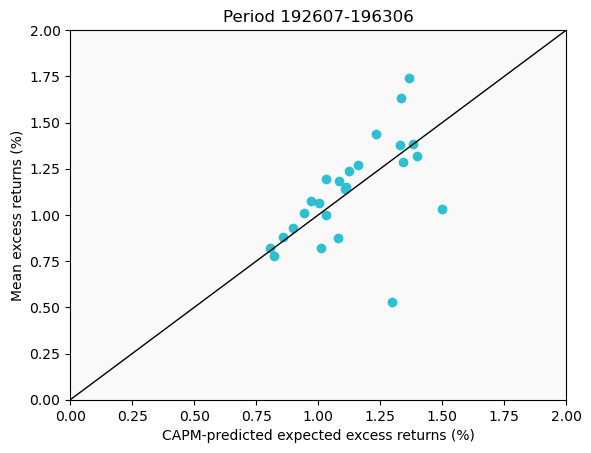

In [56]:
# Plot the mean excess returns against the CAPM predicted expected excess returns.

fig, ax = plt.subplots()

x = np.linspace(0, 2, 100)
ax.plot(x, x, color='k', lw=1)

ax.scatter(capm_first.mean()*100, test_er.mean()*100, color='#2DC0D2')

ax.set_title('Period 192607-196306')
ax.set_facecolor('#F9F9F9')
ax.set_xlabel('CAPM-predicted expected excess returns (%)')
ax.set_ylabel('Mean excess returns (%)')
ax.set_xmargin(0)
ax.set_ymargin(0)

plt.show()

In [57]:
# Conduct GRS test.

from scipy.stats import f
from numpy.linalg import inv

def GRS(α, resids, factors):
    """ 
    Conduct a Gibbons-Ross-Shanken (GRS) test and return the statistic and the p-value.

    α:       N⨉1 vector of intercepts from the time-series regressions
    resids:  T⨉N matrix of residuals
    factors: T⨉K matrix of factor returns
    """
    T, N = resids.shape
    _, K = factors.shape

    factor_mean = np.nanmean(factors, axis=0)
    Σ = np.matmul(resids.T, resids) / T
    Ω = np.matmul((factors - factor_mean).T, factors - factor_mean) / T
    
    # Compute the test statistic and the corresponding p-value.
    A = np.matmul(np.matmul(α.T, inv(Σ)), α)
    B = 1 + np.matmul(np.matmul(factor_mean.T, inv(Ω)), factor_mean)
    grs = ((T - N - K) / N) * (A / B)
    p_val = 1 - f.cdf(grs, N, T-N-K)

    return grs, p_val


# Run time-series regressions for 25 portfolios to get α.
alphas = []
resids = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=sm.add_constant(factors['Mkt-RF'])).fit()
    alphas.append(reg_ts.params['const'])
    resids.append(reg_ts.resid.rename(test))

α = np.array(alphas).reshape(-1, 1)
resids = pd.DataFrame(resids).T.values
factor = factors['Mkt-RF'].values.reshape(-1, 1)

# Conduct GRS test.
grs, p_val = GRS(α, resids, factor)
print(f'test statistic: {grs}, p-value: {p_val}')

test statistic: [[1.33047882]], p-value: [[0.13421967]]


In [58]:
# (b) Repeat part (a) for the period 196307-202412.
df1_second = df1.loc['1963-07-01':, :]
df2_second = df2.loc['1963-07-01':, :]

Rf = df1_second.loc[:, ['RF']]
factors = df1_second.loc[:, ['Mkt-RF', 'SMB', 'HML']]

# Compute excess returns for test assets.
test_er = df2_second - Rf.values

# Convert to decimal numbers.
test_er = test_er / 100
factors = factors / 100

# Run time-series regressions for 25 portfolios.
estimated = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=factors['Mkt-RF']).fit()
    estimated.append(reg_ts.fittedvalues.rename(test))

capm_second = pd.DataFrame(estimated).T

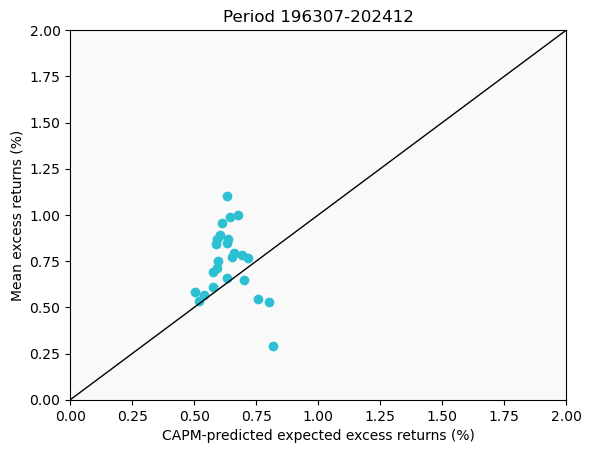

In [59]:
# Plot the mean excess returns against the CAPM predicted expected excess returns.

fig, ax = plt.subplots()

x = np.linspace(0, 2, 100)
ax.plot(x, x, color='k', lw=1)

ax.scatter(capm_second.mean()*100, test_er.mean()*100, color='#2DC0D2')

ax.set_title('Period 196307-202412')
ax.set_facecolor('#F9F9F9')
ax.set_xlabel('CAPM-predicted expected excess returns (%)')
ax.set_ylabel('Mean excess returns (%)')
ax.set_xmargin(0)
ax.set_ymargin(0)

plt.show()

In [60]:
# Run time-series regressions for 25 portfolios to get α.
alphas = []
resids = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=sm.add_constant(factors['Mkt-RF'])).fit()
    alphas.append(reg_ts.params['const'])
    resids.append(reg_ts.resid.rename(test))

α = np.array(alphas).reshape(-1, 1)
resids = pd.DataFrame(resids).T.values
factor = factors['Mkt-RF'].values.reshape(-1, 1)

# Conduct GRS test.
grs, p_val = GRS(α, resids, factor)
print(f'test statistic: {grs}, p-value: {p_val}')

test statistic: [[4.18426353]], p-value: [[8.70672423e-11]]


In [61]:
# (c) Repeat part (a) with 3 factors (RmRf, SMB, HML).

df1_first = df1.loc[:'1963-06-01', :]
df2_first = df2.loc[:'1963-06-01', :]

Rf = df1_first.loc[:, ['RF']]
factors = df1_first.loc[:, ['Mkt-RF', 'SMB', 'HML']]

# Compute excess returns for test assets.
test_er = df2_first - Rf.values

# Convert to decimal numbers.
test_er = test_er / 100
factors = factors / 100

# Run time-series regressions for 25 portfolios.
estimated = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=factors).fit()
    estimated.append(reg_ts.fittedvalues.rename(test))

FF3_first = pd.DataFrame(estimated).T

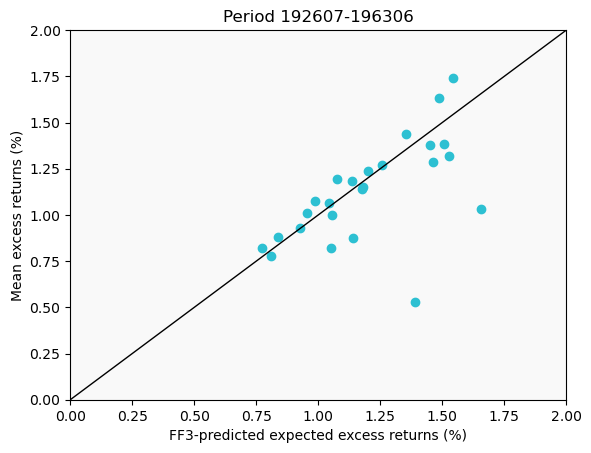

In [62]:
# Plot the mean excess returns against the CAPM predicted expected excess returns.

fig, ax = plt.subplots()

x = np.linspace(0, 2, 100)
ax.plot(x, x, color='k', lw=1)

ax.scatter(FF3_first.mean()*100, test_er.mean()*100, color='#2DC0D2')

ax.set_title('Period 192607-196306')
ax.set_facecolor('#F9F9F9')
ax.set_xlabel('FF3-predicted expected excess returns (%)')
ax.set_ylabel('Mean excess returns (%)')
ax.set_xmargin(0)
ax.set_ymargin(0)

plt.show()

In [63]:
# Run time-series regressions for 25 portfolios to get α.
alphas = []
resids = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=sm.add_constant(factors)).fit()
    alphas.append(reg_ts.params['const'])
    resids.append(reg_ts.resid.rename(test))

α = np.array(alphas).reshape(-1, 1)
resids = pd.DataFrame(resids).T.values
factor = factors.values

# Conduct GRS test.
grs, p_val = GRS(α, resids, factor)
print(f'test statistic: {grs}, p-value: {p_val}')

test statistic: [[1.55759394]], p-value: [[0.04382914]]


In [64]:
# (d) Repeat part (c) for 196307-202412.

df1_second = df1.loc['1963-07-01':, :]
df2_second = df2.loc['1963-07-01':, :]

Rf = df1_second.loc[:, ['RF']]
factors = df1_second.loc[:, ['Mkt-RF', 'SMB', 'HML']]

# Compute excess returns for test assets.
test_er = df2_second - Rf.values

# Convert to decimal numbers.
test_er = test_er / 100
factors = factors / 100

# Run time-series regressions for 25 portfolios.
estimated = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=factors).fit()
    estimated.append(reg_ts.fittedvalues.rename(test))

FF3_second = pd.DataFrame(estimated).T

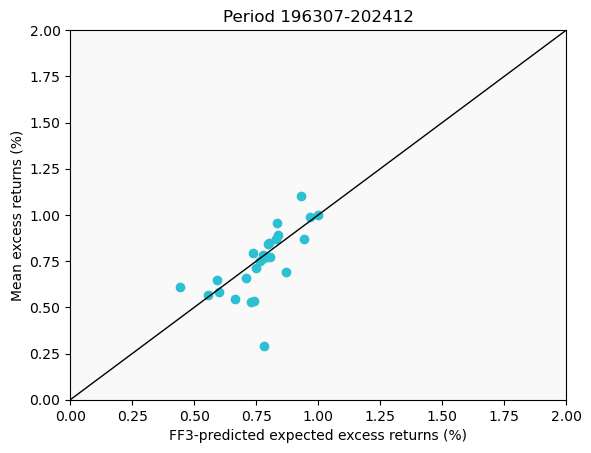

In [65]:
# Plot the mean excess returns against the CAPM predicted expected excess returns.

fig, ax = plt.subplots()

x = np.linspace(0, 2, 100)
ax.plot(x, x, color='k', lw=1)

ax.scatter(FF3_second.mean()*100, test_er.mean()*100, color='#2DC0D2')

ax.set_title('Period 196307-202412')
ax.set_facecolor('#F9F9F9')
ax.set_xlabel('FF3-predicted expected excess returns (%)')
ax.set_ylabel('Mean excess returns (%)')
ax.set_xmargin(0)
ax.set_ymargin(0)

plt.show()

In [66]:
# Run time-series regressions for 25 portfolios to get α.

alphas = []
resids = []

for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=sm.add_constant(factors)).fit()
    alphas.append(reg_ts.params['const'])
    resids.append(reg_ts.resid.rename(test))

α = np.array(alphas).reshape(-1, 1)
resids = pd.DataFrame(resids).T.values
factor = factors.values

# Conduct GRS test.
grs, p_val = GRS(α, resids, factor)
print(f'test statistic: {grs}, p-value: {p_val}')

test statistic: [[3.70484179]], p-value: [[5.1143223e-09]]


In [67]:
df3.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')

In [68]:
# (e) 5 Factor models

Rf = df3.loc[:, ['RF']]
factors = df3.loc[:, ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Compute excess returns for test assets.
test_er = df2_second - Rf.values

# Convert to decimal numbers.
test_er = test_er / 100
factors = factors / 100

# Run time-series regressions for 25 portfolios.
estimated = []
for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=factors).fit()
    estimated.append(reg_ts.fittedvalues.rename(test))

FF5 = pd.DataFrame(estimated).T

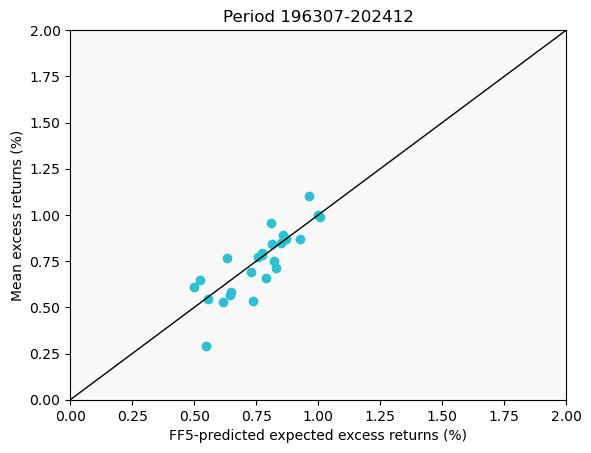

In [71]:
# Plot the mean excess returns against the CAPM predicted expected excess returns.

fig, ax = plt.subplots()

x = np.linspace(0, 2, 100)
ax.plot(x, x, color='k', lw=1)

ax.scatter(FF5.mean()*100, test_er.mean()*100, color='#2DC0D2')

ax.set_title('Period 196307-202412')
ax.set_facecolor('#F9F9F9')
ax.set_xlabel('FF5-predicted expected excess returns (%)')
ax.set_ylabel('Mean excess returns (%)')
ax.set_xmargin(0)
ax.set_ymargin(0)

plt.show()

In [70]:
# Run time-series regressions for 25 portfolios to get α.

alphas = []
resids = []

for test in test_er.columns:
    reg_ts = sm.OLS(endog=test_er[test], exog=sm.add_constant(factors)).fit()
    alphas.append(reg_ts.params['const'])
    resids.append(reg_ts.resid.rename(test))

α = np.array(alphas).reshape(-1, 1)
resids = pd.DataFrame(resids).T.values
factor = factors.values

# Conduct GRS test.
grs, p_val = GRS(α, resids, factor)
print(f'test statistic: {grs}, p-value: {p_val}')

test statistic: [[3.03834034]], p-value: [[1.22565867e-06]]
